In [1]:
'''
    Adarsh Anand 
    Scraping data from the AnimePlanet website https://www.anime-planet.com/
'''

import requests
from bs4 import BeautifulSoup
import urllib.parse as parse
import re
from IPython.display import Image


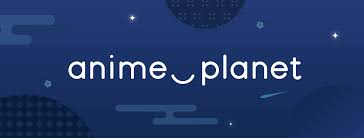

In [2]:
def details(soup):
    info = soup.find("div", {"class": "pure-1 md-3-5"})
    print("About the Anime : \n", "  ", info.find("p").getText(), "\n")

    # using regex for only selecting numbers
    total_episodes = soup.find("div", {"class": "pure-1 md-1-5"})
    print(
        "Total number of episodes : ",
        re.sub("[^0-9]", "", total_episodes.find("span").getText()),
    )

    Active_years = soup.find("span", {"class": "iconYear"})
    print("Years Active (From-To) : ", Active_years.getText(), "\n")

    rating = soup.find("div", {"class": "avgRating"})
    print("Rating : ", rating.find("span").getText())

    tags = soup.find("div", {"class": "tags"})
    list = []
    for _ in range(4):
        list.append(tags.find("ul").getText())
    print("Tags :")
    
    print((list[0].replace("\n", " ")))


In [3]:
def entry():
    anime_name = "Death-Note"
    # anime_name = (
    #     input("[+] Enter the name of the Anime : ").strip().title().replace(" ", "-")
    # )
    print(anime_name)


    global search_url
    search_url = "https://www.anime-planet.com/anime/" + anime_name
    source_code = requests.get(search_url)
    content = source_code.content
    
    global soup
    soup = BeautifulSoup(content, features="html.parser")

    try:
        details(soup)
    except AttributeError:
        print("Anime info not found")


if __name__ == "__main__":
    entry()


Death-Note
About the Anime : 
    Have you ever felt like the world would be a better place if certain people weren’t around? Such grim daydreams might occur when watching the dismal daily news, but on one fateful day, Light Yagami finds that these daydreams can become reality. By pure happenstance, he comes across a black notebook entitled "Death Note", whose text within states that whoever's name is written on its pages will die. With the aid of the death god Ryuk, Light takes it upon himself to rid the world of its corruption, ushering in a new era of purity one death at a time. But as Ryuk foretells, Light's actions will not go unchallenged... 

Total number of episodes :  37
Years Active (From-To) :   2006 - 2007  

Rating :  4.327 out of 5 from 162,176 votes
Tags :
   Mystery     Shounen     Crime     Criminals     Detectives      Mind Games     Overpowered Main Characters     Psychological     Psychopaths     Rivalries     Secret Identity     Serial Killers     Shinigami     Sup

In [4]:
# Task to add image of the anime 

# image = soup.find("svg", {"id": "logo"})
# Image(url=image.get("data-src"))